In [18]:
import pickle
import random_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.figsize']


%matplotlib inline

In [19]:
with open('experiment_store.pickle', 'rb') as f:
    EXPERIMENT_STORE = pickle.load(f)
with open('experiment_store_1.pickle', 'rb') as f:
    EXPERIMENT_STORE1 = pickle.load(f)
with open('experiment_store_2.pickle', 'rb') as f:
    EXPERIMENT_STORE2 = pickle.load(f)
# with open('experiment_store_3.pickle', 'rb') as f:
#     EXPERIMENT_STORE3 = pickle.load(f)
with open('experiment_store_4.pickle', 'rb') as f:
    EXPERIMENT_STORE4 = pickle.load(f)
EXPERIMENT_STORES = [EXPERIMENT_STORE, EXPERIMENT_STORE1, EXPERIMENT_STORE2, EXPERIMENT_STORE4]

In [3]:
EXPERIMENT_STORE = sum(EXPERIMENT_STORES, [])
len(EXPERIMENT_STORE)

116

In [7]:
sorted_experiments = sorted(EXPERIMENT_STORE, key=lambda x: x['acc_mean'], reverse=True)

In [8]:
top_5_experiments = sorted_experiments[0:5]

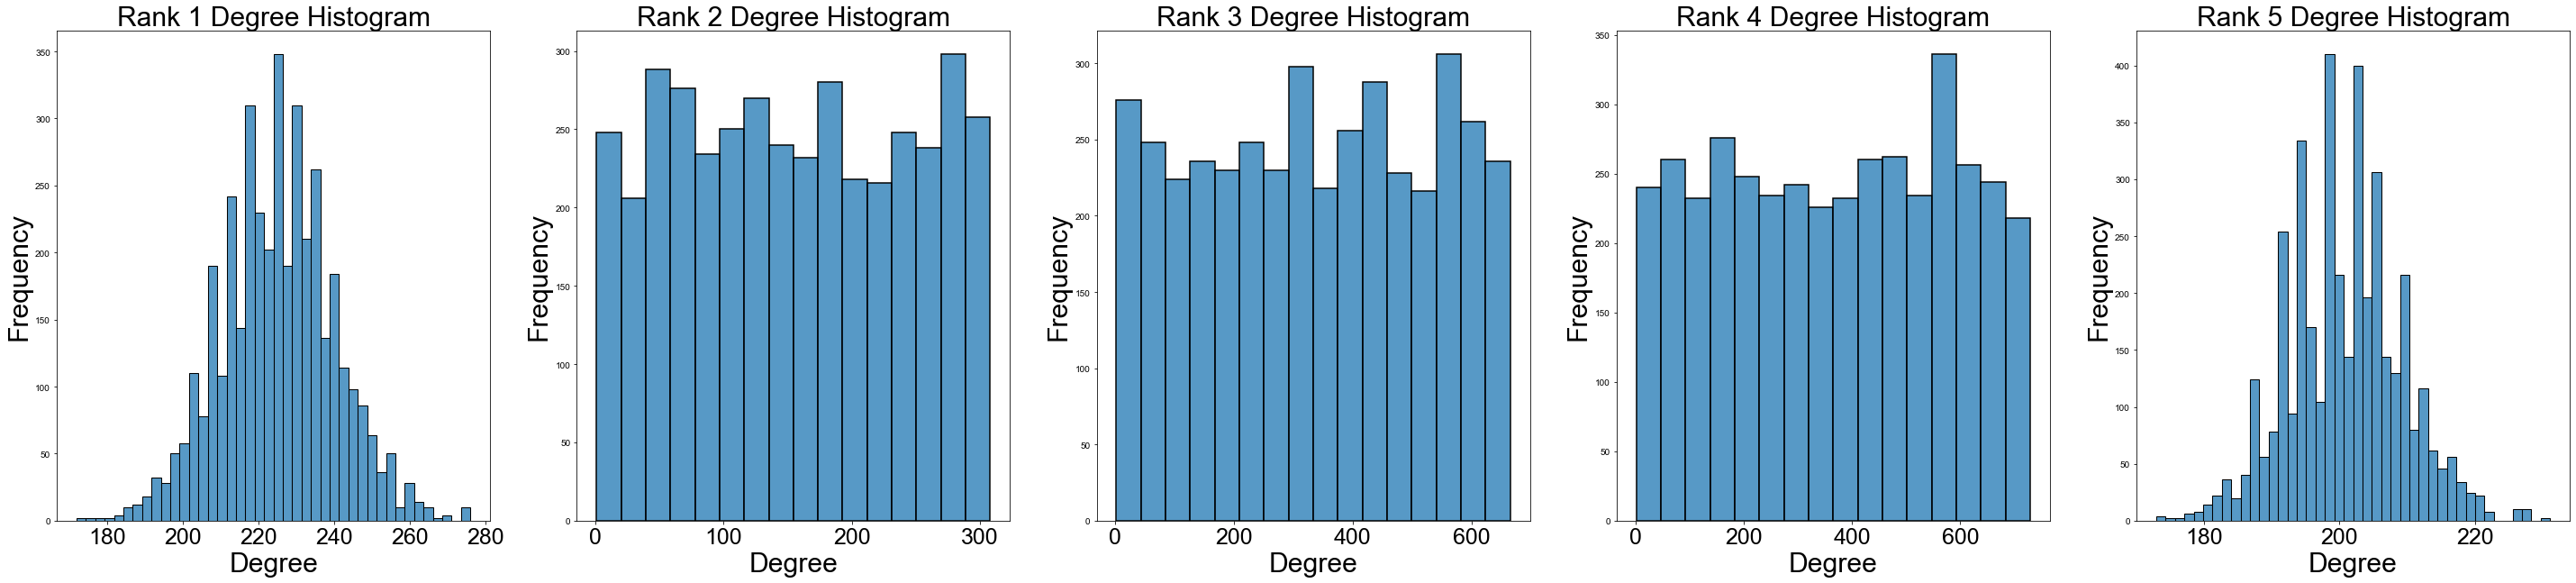

In [48]:
ncols = len(top_5_experiments)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(50, 10))
with sns.plotting_context("talk", font_scale=2):
    for index, experiment in enumerate(top_5_experiments):
        if 'degree_sequence_W' in experiment['parameters'].keys():
            degree_sequence=experiment['parameters']['degree_sequence_W']
            indegree, outdegree = zip(*degree_sequence)
            sns.histplot(indegree + outdegree, ax=axes[index], label='big')
            axes[index].set_xlabel("Degree", fontsize = 30)
            axes[index].set_ylabel("Frequency", fontsize = 30)
            axes[index].set_title(f"Rank {index+1} Degree Histogram", fontsize = 30)
            axes[index].tick_params(axis='x', labelsize=25 )


In [166]:
labels = np.tile(np.arange(0, 10), (1000, 1)).flatten('F')

In [167]:
labels

array([0, 0, 0, ..., 9, 9, 9])

[[864   1  47   5   2  13  44  17   4   3]
 [  0 749   0   5   1  12   0   4 216  13]
 [ 29 153 462  26 190  13  46  24  46  11]
 [ 26  47  10 776  11  19   7  11  33  60]
 [  0  27   1  12 694   3  78  38   5 142]
 [ 43  23   2 366  12 361  70  28  25  70]
 [ 14  88   1   5  31  12 842   4   1   2]
 [  7  20  13   9  18   1   0 734  41 157]
 [  7 107  48 170  33  27  38  17 481  72]
 [ 15   5   9  82 130   1   6 270   9 473]]
[[837   1  68   2   1   9  59  18   1   4]
 [  0 765   1   1   0   2   6   1 216   8]
 [ 43 162 472  13 159   7  54  18  68   4]
 [ 30  60  13 765  12  10  24  15  29  42]
 [  1  34   0   6 637   3 106  26   9 178]
 [ 36  33   1 308   8 348 135  36  13  82]
 [  9  78   3   2  21  10 874   3   0   0]
 [ 12  29  11  10  12   0   4 741  47 134]
 [ 10 125  54 128  20  20  67  10 481  85]
 [ 15   8  12  83 107   0  26 249   8 492]]
[[886   0  39   4   2   5  43   8  10   3]
 [  0 532   1   9   0  18  12   2 419   7]
 [ 37  47 560  34 135   7  76  13  88   3]
 [ 35  16

/var/folders/hl/hphwgcmj5klg4y0m96np3mdm0000gn/T/ipykernel_64213/3311927351.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


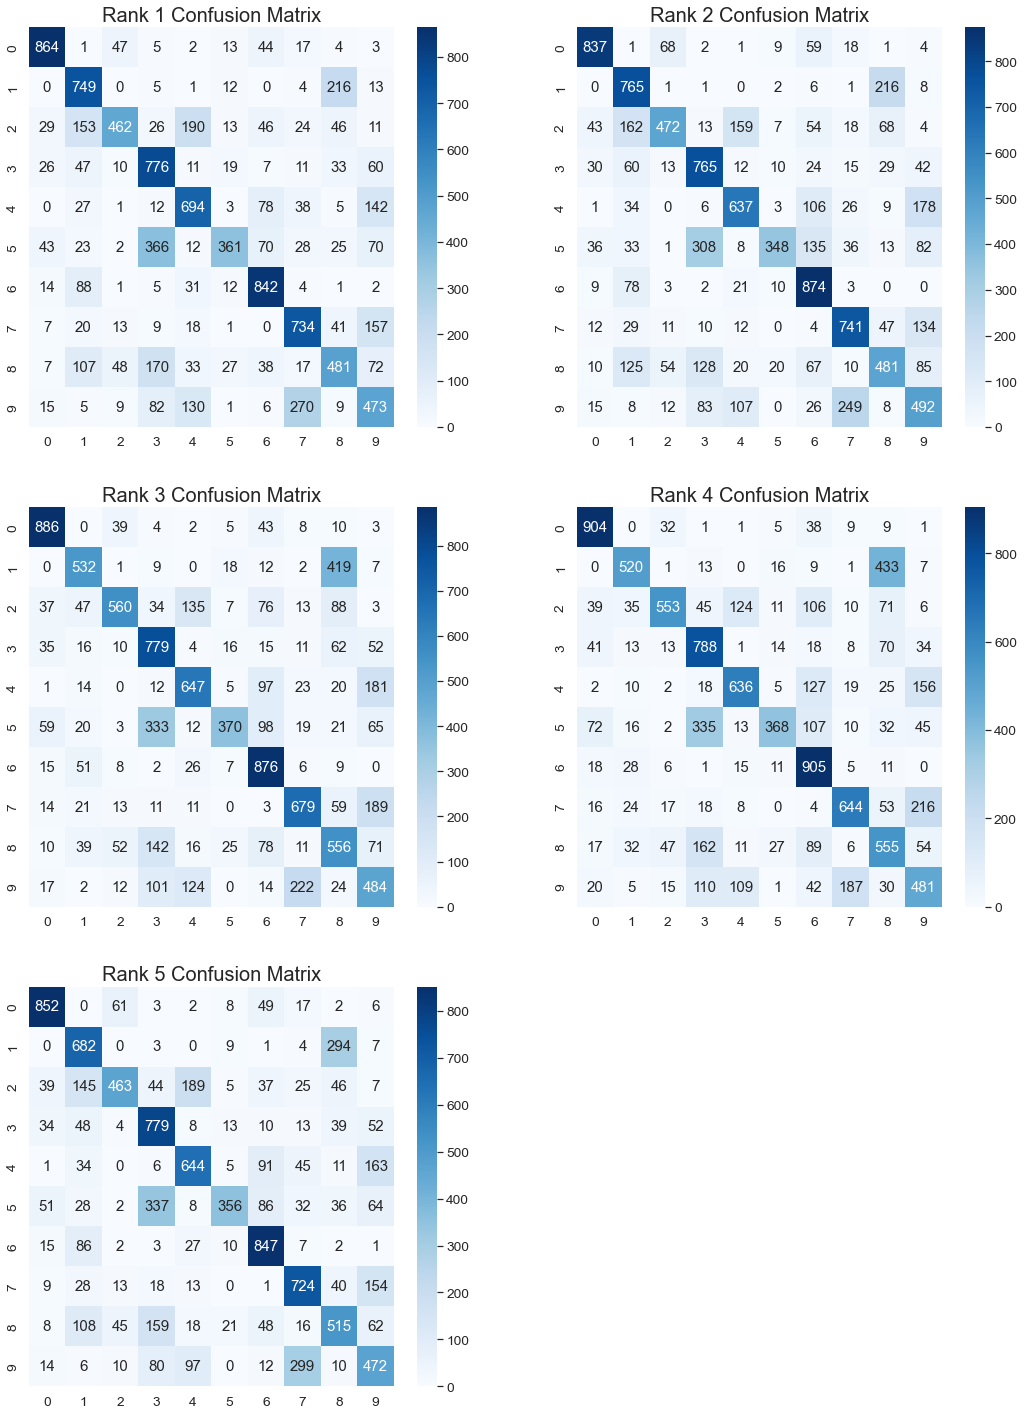

In [175]:
from sklearn.metrics import confusion_matrix
ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 25))
fig.delaxes(axes[2][1])
for index, experiment in enumerate(top_5_experiments):
    # print(experiment.keys())
    if 'labels' in experiment.keys():
        # print(experiment['predictions'])
        cf_matrix = confusion_matrix(labels, experiment['predictions'])
        print(cf_matrix)
        sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt='g', ax=axes[index//ncols, index%ncols])
        ax=axes[index//ncols, index%ncols].set_title(f"Rank {index+1} Confusion Matrix", fontsize = 20)
fig.show()

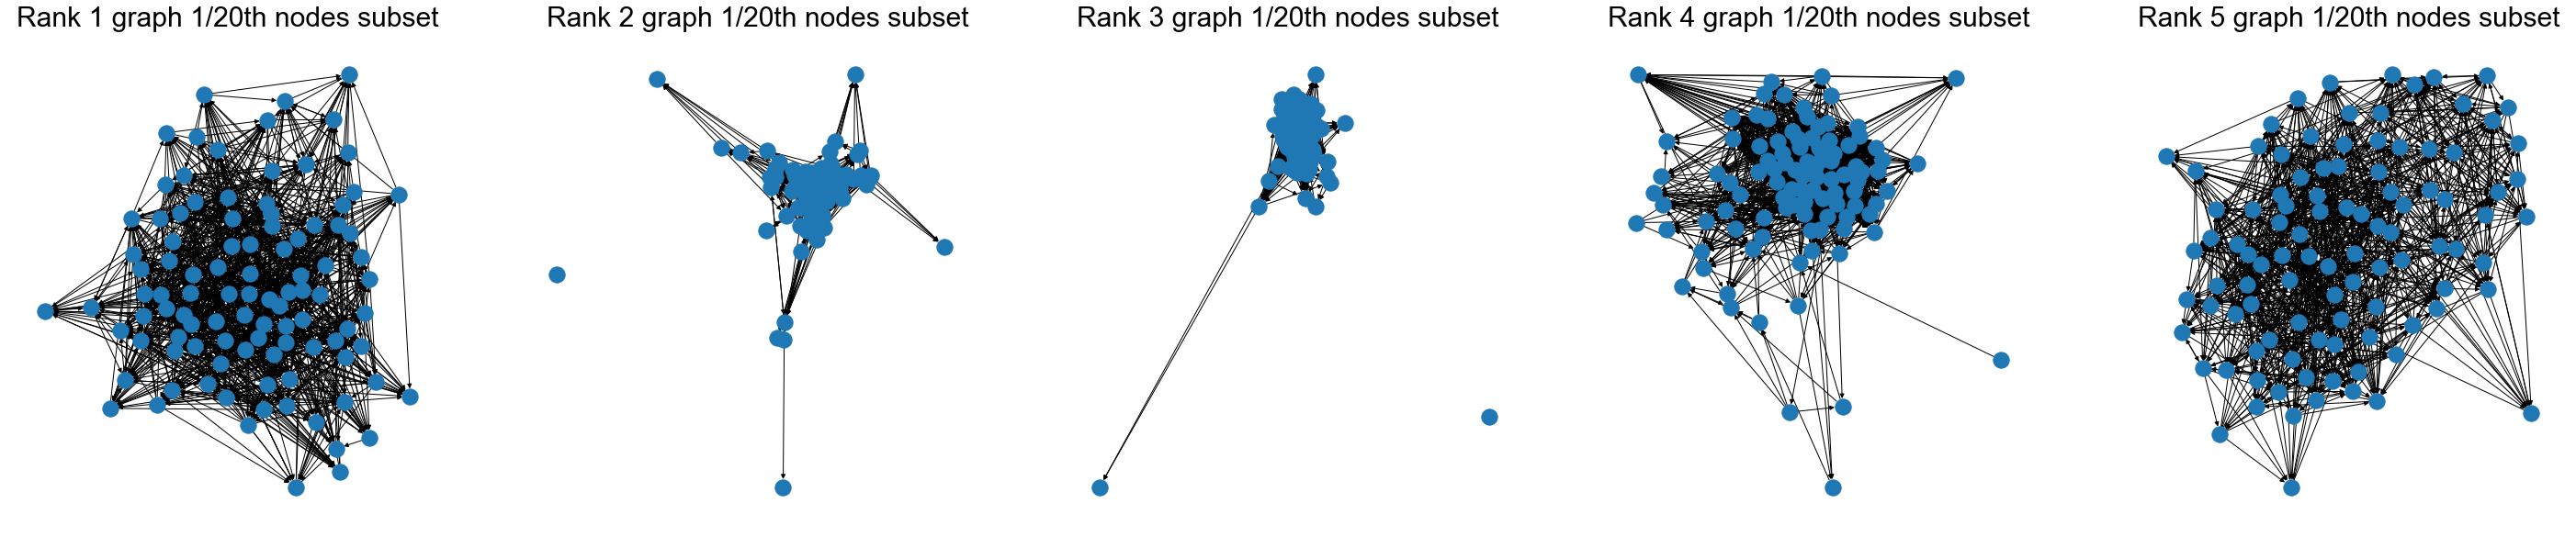

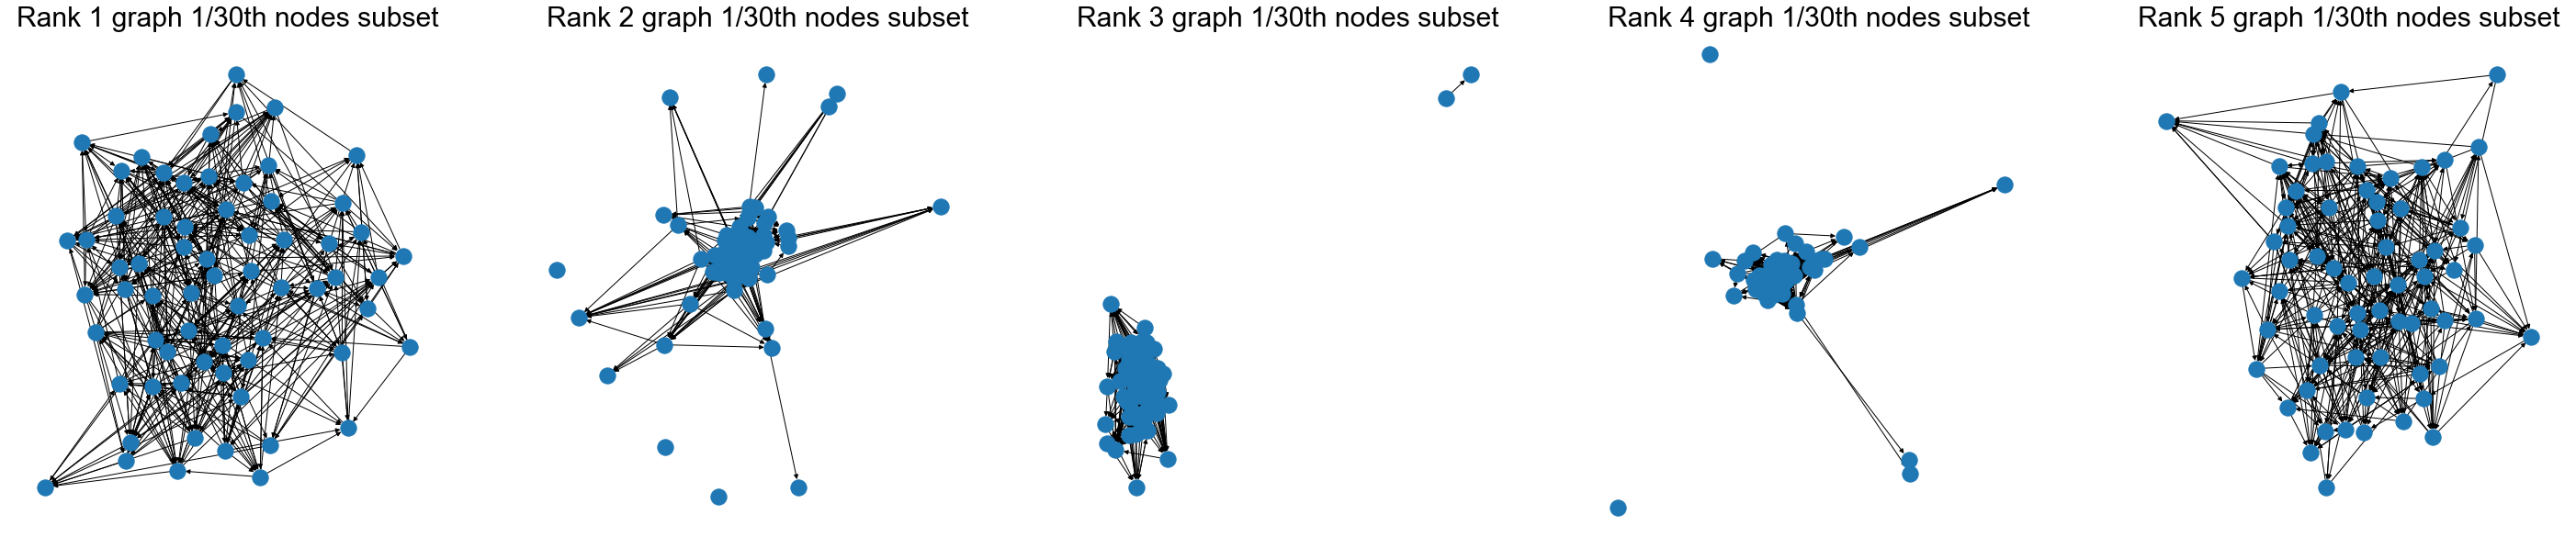

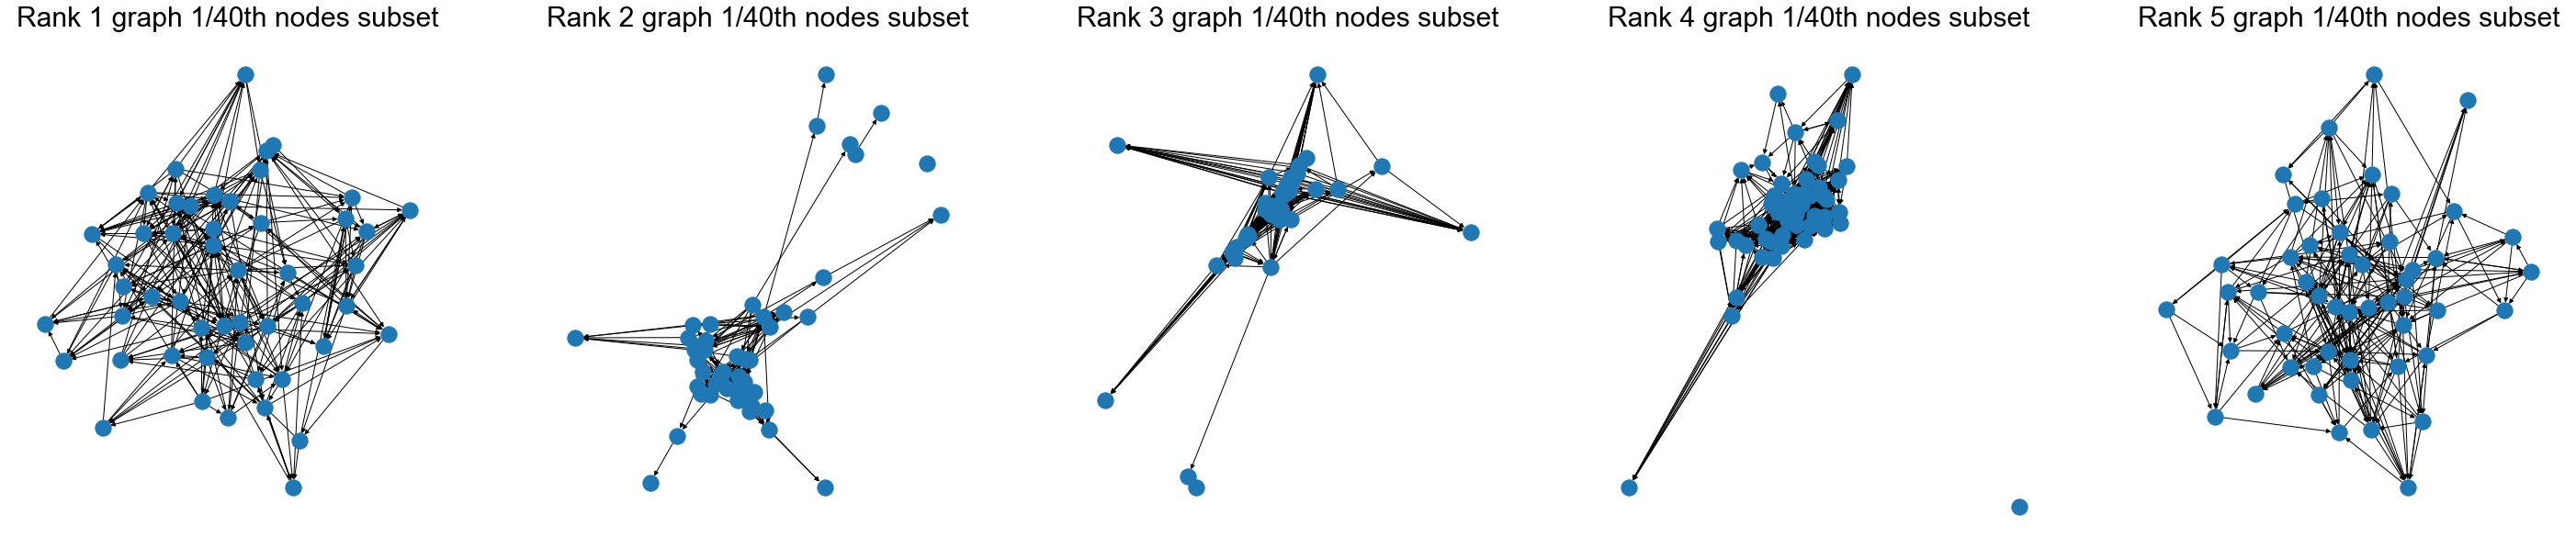

In [17]:
ncols = len(top_5_experiments)

for factor in [20, 30, 40]:
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(50, 10))
    for index, experiment in enumerate(top_5_experiments):
        if 'degree_sequence_W' in experiment['parameters'].keys():
            degree_sequence=experiment['parameters']['degree_sequence_W']
            n_iter=experiment['parameters']['n_iter']

            A_edges = random_graph.sample_directed_graph(degree_sequence=degree_sequence, n_iter=n_iter)
            A_graph = nx.DiGraph()
            A_graph.add_nodes_from(range(len(experiment['parameters']['degree_sequence_W'])))
            A_graph.add_edges_from(A_edges)
        
            indices = np.random.choice(len(experiment['parameters']['degree_sequence_W']), size=len(experiment['parameters']['degree_sequence_W'])//factor, replace=False)
            nx.draw(A_graph.subgraph(indices), ax=axes[index])
            axes[index].set_title(f"Rank {index+1} graph 1/{factor}th nodes subset", fontsize = 30)

    fig.savefig(f'random_graph_subset_1_{factor}th_nodes_1.png')


In [24]:
experiment_df

,n_iter,cap_size,beta_factor,a_sparsity,accuracy
0,433,181,1.436200,0.142192,0.6436
1,663,170,1.174426,0.109547,0.6412
2,1903,196,1.123640,0.168695,0.6369
3,791,200,1.064313,0.147070,0.6354
4,1785,181,1.330445,0.116377,0.6334
...,...,...,...,...,...
111,399,142,0.275685,0.042365,0.4855
112,716,113,0.737830,0.270952,0.4716
113,1686,140,0.174954,0.052942,0.4673
114,651,114,0.345459,0.154213,0.4489


In [27]:
import scipy
non_graphical_hyperparameters = []

relevant_keys = [
    'n_iter', 
    'cap_size', 
    'beta_factor', 
    'a_sparsity', 
    # 'n_rounds'
]

for experiment in sorted_experiments:
    if 'acc_mean' in experiment.keys():
        experiment_subset = {key: value for key, value in experiment['parameters'].items() if key in relevant_keys}
        # print(experiment.keys())
        experiment_subset['accuracy'] = experiment['acc_mean']
        non_graphical_hyperparameters.append(experiment_subset)

experiment_df = pd.DataFrame(non_graphical_hyperparameters)
transformed_experiment_df = experiment_df.copy()
transformed_experiment_df['accuracy'] = scipy.special.logit(experiment_df['accuracy'])

num_cols = transformed_experiment_df.columns[transformed_experiment_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
standardized_experiment_df_numeric = StandardScaler().fit_transform(transformed_experiment_df[num_cols])
standardized_experiment_df = transformed_experiment_df.copy()
standardized_experiment_df[num_cols] = standardized_experiment_df_numeric

print(standardized_experiment_df)

       n_iter  cap_size  beta_factor  a_sparsity  accuracy
0   -1.370849  0.990331     1.759803   -0.262125  1.345269
1   -0.929675  0.612554     1.056089   -0.657409  1.287748
2    1.448832  1.505480     0.919565    0.058780  1.185112
3   -0.684151  1.642853     0.760080   -0.203063  1.149432
4    1.222490  0.990331     1.475506   -0.574700  1.101956
..        ...       ...          ...         ...       ...
111 -1.436066 -0.349058    -1.359942   -1.470874 -2.228151
112 -0.828013 -1.345014    -0.117585    1.296951 -2.534853
113  1.032593 -0.417745    -1.630733   -1.342799 -2.629906
114 -0.952692 -1.310671    -1.172373   -0.116569 -3.038039
115  1.047939 -0.761178    -1.743092    0.990132 -4.017496

[116 rows x 5 columns]


In [112]:
experiment_df.columns = ['randomness iterations', 'cap size', 'beta factor', 'activation sparsity', 'accuracy']

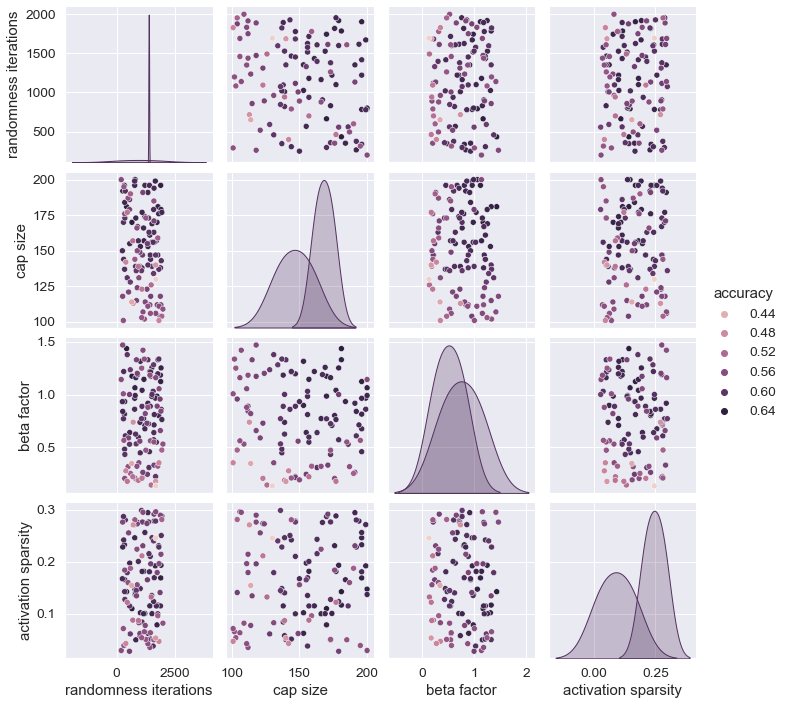

In [114]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(font_scale = 1.25)
sns.pairplot(experiment_df, hue="accuracy", diag_kind="auto")
# plt.suptitle('Average Accuracy vs. Pairwise Plot of Features', fontsize=30, y=1.03)

In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

model_data_list = []

current_df = standardized_experiment_df
current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

clf = LinearRegression()
scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
print("%0.2f R-squared with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(current_df_num_x, current_df['accuracy'])

feature_coefficient_pairs = sorted(list(zip(current_df_num_x.columns, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

print(f"All types")
print(feature_coefficient_pairs)
print()

model_data = {
    'coefficients': clf.coef_,
    'intercept': clf.intercept_,
    'model': clf,
    'poly_features': None,
    'feature_coefficient_pairs': feature_coefficient_pairs
}

model_data_list.append(model_data)

with open('linear_model_data_list.pickle', 'wb') as fp:
    pickle.dump(model_data_list, fp)

-112.69 R-squared with a standard deviation of 146.70
All types
[('beta_factor', 0.558463558784572), ('cap_size', 0.5409986123523594), ('n_iter', 0.1199008735230043), ('a_sparsity', 0.0939570612689474)]



In [29]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model_data_list = []

current_df = standardized_experiment_df
current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly_transformed_data = poly.fit_transform(current_df_num_x)
poly_feature_names = poly.get_feature_names_out()

clf = LinearRegression()

scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
print("%0.2f R-squared with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(poly_transformed_data, current_df['accuracy'])

feature_coefficient_pairs = sorted(list(zip(poly_feature_names, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

print(f"all types")
print(feature_coefficient_pairs)
print()

model_data = {
    'distribution type': 'all',
    'coefficients': clf.coef_,
    'intercept': clf.intercept_,
    'model': clf,
    'poly_features': poly,
    'feature_coefficient_pairs': feature_coefficient_pairs
}

model_data_list.append(model_data)

-112.69 R-squared with a standard deviation of 146.70
all types
[('beta_factor', 0.5647255603288287), ('cap_size', 0.5163698812508142), ('a_sparsity', 0.11802454521233248), ('n_iter', 0.0981516102476533), ('beta_factor a_sparsity', -0.09331470539418986), ('cap_size a_sparsity', 0.09031112771821279), ('n_iter cap_size', 0.05276781158082827), ('n_iter a_sparsity', -0.051166505136286525), ('n_iter beta_factor', 0.04625828214646041), ('cap_size beta_factor', 0.044744030989433414)]

